<a href="https://colab.research.google.com/github/salzakartika1802/SENTIMENT-ANALYSIS-USING-KNN-AND-SVM/blob/main/PLS_KENEK_PLS_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Twitter Auth Token

twitter_auth_token = '671d1c5652499ee25e1eed458cd795b3671f7b00'

# **CRAWLING DATA TWITTER**





In [ ]:
# Import required Python package
!pip install pandas

# Install Node.js (because tweet-harvest built using Node.js)
!sudo apt-get update
!sudo apt-get install -y ca-certificates curl gnupg
!sudo mkdir -p /etc/apt/keyrings
!curl -fsSL https://deb.nodesource.com/gpgkey/nodesource-repo.gpg.key | sudo gpg --dearmor -o /etc/apt/keyrings/nodesource.gpg

!NODE_MAJOR=20 && echo "deb [signed-by=/etc/apt/keyrings/nodesource.gpg] https://deb.nodesource.com/node_$NODE_MAJOR.x nodistro main" | sudo tee /etc/apt/sources.list.d/nodesource.list

!sudo apt-get update
!sudo apt-get install nodejs -y

!node -v

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,311 kB]
Get:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,655 kB]
Get:13 http://security.ubuntu.com/ubun

In [ ]:
# Crawl Data

filename = 'naturalisasi.csv'
search_keyword = 'naturalisasi lang:id'
limit = 1000

!npx --yes tweet-harvest@2.6.1 -o "{filename}" -s "{search_keyword}" -l {limit} --token {twitter_auth_token}

⠙⠹⠸⠼

## **DATA PREPROCESSING**

In [ ]:
#data preprocessing
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("datasetfinal.csv")
df.head()

,full_text
0,Siapapun yg ingin meng harum kan negara harus...
1,Klo full skuad saya tunggu timnas inti<br>Form...
2,Biasa aja
3,Brut mbelgedes
4,"Setiap hari hanya naturalisasi , buktinya omon..."


1. DATA CLEANING


In [ ]:
import re

def clean_twitter_text(kalimat):
    if not isinstance(kalimat, str) or kalimat is None:
        return ""

    # Hapus HTML tags (pastikan ini dilakukan di awal)
    kalimat = re.sub(r'<.*?>', ' ', kalimat)

    # Hapus mention (@username)
    kalimat = re.sub(r'@[A-Za-z0-9_]+', '', kalimat)

    # Hapus hashtag (#hashtag)
    kalimat = re.sub(r'#[A-Za-z0-9]+', '', kalimat)

    # Hapus retweet (RT)
    kalimat = re.sub(r'RT[\s]+', '', kalimat)

    # Hapus link (http/https)
    kalimat = re.sub(r'https?\S+', '', kalimat)

    # Hapus angka
    kalimat = re.sub(r'\d+', '', kalimat)

    # Hapus emoji
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"
        u"\U0001F300-\U0001F5FF"
        u"\U0001F680-\U0001F6FF"
        u"\U0001F700-\U0001F77F"
        u"\U0001F780-\U0001F7FF"
        u"\U0001F800-\U0001F8FF"
        u"\U0001F900-\U0001F9FF"
        u"\U0001FA00-\U0001FA6F"
        u"\U0001FA70-\U0001FAFF"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE
    )
    kalimat = emoji_pattern.sub(r'', kalimat)

    # Hapus karakter non-alfanumerik kecuali spasi
    kalimat = re.sub(r'[^a-zA-Z0-9\s]', '', kalimat)

    # Tambahkan spasi antara kata jika ada camel case (contoh: MengharumkanNegara → Mengharumkan Negara)
    kalimat = re.sub(r'(?<=[a-z])(?=[A-Z])', ' ', kalimat)

    # Hapus spasi ganda dan trim
    kalimat = re.sub(r'\s+', ' ', kalimat).strip()

    return kalimat

# Terapkan ke DataFrame
df['cleaned'] = df['full_text'].apply(clean_twitter_text)

# Tampilkan hasil
df.head(10)


,full_text,cleaned
0,Siapapun yg ingin meng harum kan negara harus...,Siapapun yg ingin meng harum kan negara harus ...
1,Klo full skuad saya tunggu timnas inti<br>Form...,Klo full skuad saya tunggu timnas inti Formasi...
2,Biasa aja,Biasa aja
3,Brut mbelgedes,Brut mbelgedes
4,"Setiap hari hanya naturalisasi , buktinya omon...",Setiap hari hanya naturalisasi buktinya omong ...
5,Semoga orang indonesia diaspora merantau tki d...,Semoga orang indonesia diaspora merantau tki d...
6,Pssi harus punya streker yg ber kelas.. .,Pssi harus punya streker yg ber kelas
7,"Hayoo Garuda Indonesia, maju terus pantang mun...",Hayoo Garuda Indonesia maju terus pantang mund...
8,Ah.engga.ngerti.luh..<br>Entar.ladang.melatih....,Ahenggangertiluh Entarladangmelatihguaancur
9,"Rakyat dukung, pak erik brantas mavia2, dan mh...",Rakyat dukung pak erik brantas mavia dan mhn y...


In [ ]:
df['case_folding'] = df['cleaned'].str.lower()
df.head()

,full_text,cleaned,case_folding
0,Siapapun yg ingin meng harum kan negara harus...,Siapapun yg ingin meng harum kan negara harus ...,siapapun yg ingin meng harum kan negara harus ...
1,Klo full skuad saya tunggu timnas inti<br>Form...,Klo full skuad saya tunggu timnas inti Formasi...,klo full skuad saya tunggu timnas inti formasi...
2,Biasa aja,Biasa aja,biasa aja
3,Brut mbelgedes,Brut mbelgedes,brut mbelgedes
4,"Setiap hari hanya naturalisasi , buktinya omon...",Setiap hari hanya naturalisasi buktinya omong ...,setiap hari hanya naturalisasi buktinya omong ...


**2. Tokenisasi**



In [ ]:
import nltk
nltk.download('all')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

In [ ]:
def tokenize_text(case_folding):
  tokens = nltk.tokenize.word_tokenize(case_folding)
  return tokens

In [ ]:
df['tokenize'] = df['case_folding'].apply(tokenize_text)
df.head()

,full_text,cleaned,case_folding,tokenize
0,Siapapun yg ingin meng harum kan negara harus...,Siapapun yg ingin meng harum kan negara harus ...,siapapun yg ingin meng harum kan negara harus ...,"[siapapun, yg, ingin, meng, harum, kan, negara..."
1,Klo full skuad saya tunggu timnas inti<br>Form...,Klo full skuad saya tunggu timnas inti Formasi...,klo full skuad saya tunggu timnas inti formasi...,"[klo, full, skuad, saya, tunggu, timnas, inti,..."
2,Biasa aja,Biasa aja,biasa aja,"[biasa, aja]"
3,Brut mbelgedes,Brut mbelgedes,brut mbelgedes,"[brut, mbelgedes]"
4,"Setiap hari hanya naturalisasi , buktinya omon...",Setiap hari hanya naturalisasi buktinya omong ...,setiap hari hanya naturalisasi buktinya omong ...,"[setiap, hari, hanya, naturalisasi, buktinya, ..."


3. NORMALIZE

In [ ]:
#cek mlebu ta ga
kamus = pd.read_excel("kamuskatabaku.xlsx")
kamus.head()

,tidak_baku,kata_baku
0,woww,wow
1,aminn,amin
2,met,selamat
3,netaas,menetas
4,keberpa,keberapa


In [ ]:
# Assuming 'dict_df' is your DataFrame
kamus = pd.read_excel("kamuskatabaku.xlsx")
kamus_word={}

for index, row in kamus.iterrows():
    if row[0] not in kamus_word:
        kamus_word[row[0]] = row[1]

def normalisasi(text):
  return [kamus_word[word] if word in kamus_word else word for word in text]

df['normalisasi'] = df['tokenize'].apply(normalisasi)
df.head(200)

<ipython-input-9-8cb96d45833d>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if row[0] not in kamus_word:
<ipython-input-9-8cb96d45833d>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  kamus_word[row[0]] = row[1]


,full_text,cleaned,case_folding,tokenize,normalisasi
0,Siapapun yg ingin meng harum kan negara harus...,Siapapun yg ingin meng harum kan negara harus ...,siapapun yg ingin meng harum kan negara harus ...,"[siapapun, yg, ingin, meng, harum, kan, negara...","[siapapun, yang, ingin, meng, harum, kan, nega..."
1,Klo full skuad saya tunggu timnas inti<br>Form...,Klo full skuad saya tunggu timnas inti Formasi...,klo full skuad saya tunggu timnas inti formasi...,"[klo, full, skuad, saya, tunggu, timnas, inti,...","[kalau, full, skuad, saya, tunggu, timnas, int..."
2,Biasa aja,Biasa aja,biasa aja,"[biasa, aja]","[biasa, saja]"
3,Brut mbelgedes,Brut mbelgedes,brut mbelgedes,"[brut, mbelgedes]","[brut, omong kosong]"
4,"Setiap hari hanya naturalisasi , buktinya omon...",Setiap hari hanya naturalisasi buktinya omong ...,setiap hari hanya naturalisasi buktinya omong ...,"[setiap, hari, hanya, naturalisasi, buktinya, ...","[setiap, hari, hanya, naturalisasi, buktinya, ..."
...,...,...,...,...,...
195,Yg kritik cm towel apalah artiny towel pemain ...,Yg kritik cm towel apalah artiny towel pemain ...,yg kritik cm towel apalah artiny towel pemain ...,"[yg, kritik, cm, towel, apalah, artiny, towel,...","[yang, kritik, cuma, towel, apalah, artiny, to..."
196,Asaya tidak sabar melihat orang orang ini mai...,Asaya tidak sabar melihat orang orang ini main...,asaya tidak sabar melihat orang orang ini main...,"[asaya, tidak, sabar, melihat, orang, orang, i...","[asaya, tidak, sabar, melihat, orang, orang, i..."
197,Yg TK mendukung otak.a budek bik dungo,Yg TK mendukung otaka budek bik dungo,yg tk mendukung otaka budek bik dungo,"[yg, tk, mendukung, otaka, budek, bik, dungo]","[yang, tak, mendukung, otaka, budek, bik, dungo]"
198,Mudah mudahan yg mau dinaturalisasa masih bany...,Mudah mudahan yg mau dinaturalisasa masih bany...,mudah mudahan yg mau dinaturalisasa masih bany...,"[mudah, mudahan, yg, mau, dinaturalisasa, masi...","[mudah, mudahan, yang, mau, dinaturalisasi, ma..."


4. STOPWORD

In [ ]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.1 MB/s eta 0:00:00


In [ ]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
factory = StopWordRemoverFactory()
stopwords = factory.get_stop_words()
print(stopwords)

['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', '

In [ ]:
import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
def stopword(tokens):
  cleaned_tokens = []
  for token in tokens:
    if token not in stopwords:
      cleaned_tokens.append(token)
  return cleaned_tokens
df['stopword'] = df['normalisasi'].apply(stopword)
df.head(200)

,full_text,cleaned,case_folding,tokenize,normalisasi,stopword
0,Siapapun yg ingin meng harum kan negara harus...,Siapapun yg ingin meng harum kan negara harus ...,siapapun yg ingin meng harum kan negara harus ...,"[siapapun, yg, ingin, meng, harum, kan, negara...","[siapapun, yang, ingin, meng, harum, kan, nega...","[siapapun, meng, harum, kan, negara, dukungdr,..."
1,Klo full skuad saya tunggu timnas inti<br>Form...,Klo full skuad saya tunggu timnas inti Formasi...,klo full skuad saya tunggu timnas inti formasi...,"[klo, full, skuad, saya, tunggu, timnas, inti,...","[kalau, full, skuad, saya, tunggu, timnas, int...","[kalau, full, skuad, tunggu, timnas, inti, for..."
2,Biasa aja,Biasa aja,biasa aja,"[biasa, aja]","[biasa, saja]",[biasa]
3,Brut mbelgedes,Brut mbelgedes,brut mbelgedes,"[brut, mbelgedes]","[brut, omong kosong]","[brut, omong kosong]"
4,"Setiap hari hanya naturalisasi , buktinya omon...",Setiap hari hanya naturalisasi buktinya omong ...,setiap hari hanya naturalisasi buktinya omong ...,"[setiap, hari, hanya, naturalisasi, buktinya, ...","[setiap, hari, hanya, naturalisasi, buktinya, ...","[hari, naturalisasi, buktinya, omong, kosong, ..."
...,...,...,...,...,...,...
195,Yg kritik cm towel apalah artiny towel pemain ...,Yg kritik cm towel apalah artiny towel pemain ...,yg kritik cm towel apalah artiny towel pemain ...,"[yg, kritik, cm, towel, apalah, artiny, towel,...","[yang, kritik, cuma, towel, apalah, artiny, to...","[kritik, cuma, towel, apalah, artiny, towel, p..."
196,Asaya tidak sabar melihat orang orang ini mai...,Asaya tidak sabar melihat orang orang ini main...,asaya tidak sabar melihat orang orang ini main...,"[asaya, tidak, sabar, melihat, orang, orang, i...","[asaya, tidak, sabar, melihat, orang, orang, i...","[asaya, sabar, melihat, orang, orang, main, in..."
197,Yg TK mendukung otak.a budek bik dungo,Yg TK mendukung otaka budek bik dungo,yg tk mendukung otaka budek bik dungo,"[yg, tk, mendukung, otaka, budek, bik, dungo]","[yang, tak, mendukung, otaka, budek, bik, dungo]","[tak, mendukung, otaka, budek, bik, dungo]"
198,Mudah mudahan yg mau dinaturalisasa masih bany...,Mudah mudahan yg mau dinaturalisasa masih bany...,mudah mudahan yg mau dinaturalisasa masih bany...,"[mudah, mudahan, yg, mau, dinaturalisasa, masi...","[mudah, mudahan, yang, mau, dinaturalisasi, ma...","[mudah, mudahan, mau, dinaturalisasi, banyak, ..."


5. STEMMING

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
stem_factory = StemmerFactory()
stemmer = stem_factory.create_stemmer()

def stemming(tokens):
  hasil = [stemmer.stem(token) for token in tokens]
  return hasil
df['stemmed'] = df['stopword'].apply(lambda x: stemming(x))
df.head(50)


,full_text,cleaned,case_folding,tokenize,normalisasi,stopword,stemmed
0,Siapapun yg ingin meng harum kan negara harus...,Siapapun yg ingin meng harum kan negara harus ...,siapapun yg ingin meng harum kan negara harus ...,"[siapapun, yg, ingin, meng, harum, kan, negara...","[siapapun, yang, ingin, meng, harum, kan, nega...","[siapapun, meng, harum, kan, negara, dukungdr,...","[siapa, meng, harum, kan, negara, dukungdr, me..."
1,Klo full skuad saya tunggu timnas inti<br>Form...,Klo full skuad saya tunggu timnas inti Formasi...,klo full skuad saya tunggu timnas inti formasi...,"[klo, full, skuad, saya, tunggu, timnas, inti,...","[kalau, full, skuad, saya, tunggu, timnas, int...","[kalau, full, skuad, tunggu, timnas, inti, for...","[kalau, full, skuad, tunggu, timnas, inti, for..."
2,Biasa aja,Biasa aja,biasa aja,"[biasa, aja]","[biasa, saja]",[biasa],[biasa]
3,Brut mbelgedes,Brut mbelgedes,brut mbelgedes,"[brut, mbelgedes]","[brut, omong kosong]","[brut, omong kosong]","[brut, omong kosong]"
4,"Setiap hari hanya naturalisasi , buktinya omon...",Setiap hari hanya naturalisasi buktinya omong ...,setiap hari hanya naturalisasi buktinya omong ...,"[setiap, hari, hanya, naturalisasi, buktinya, ...","[setiap, hari, hanya, naturalisasi, buktinya, ...","[hari, naturalisasi, buktinya, omong, kosong, ...","[hari, naturalisasi, bukti, omong, kosong, ban..."
5,Semoga orang indonesia diaspora merantau tki d...,Semoga orang indonesia diaspora merantau tki d...,semoga orang indonesia diaspora merantau tki d...,"[semoga, orang, indonesia, diaspora, merantau,...","[semoga, orang, indonesia, diaspora, merantau,...","[semoga, orang, indonesia, diaspora, merantau,...","[moga, orang, indonesia, diaspora, rantau, tki..."
6,Pssi harus punya streker yg ber kelas.. .,Pssi harus punya streker yg ber kelas,pssi harus punya streker yg ber kelas,"[pssi, harus, punya, streker, yg, ber, kelas]","[pssi, harus, punya, streker, yang, ber, kelas]","[pssi, punya, streker, ber, kelas]","[pssi, punya, streker, ber, kelas]"
7,"Hayoo Garuda Indonesia, maju terus pantang mun...",Hayoo Garuda Indonesia maju terus pantang mund...,hayoo garuda indonesia maju terus pantang mund...,"[hayoo, garuda, indonesia, maju, terus, pantan...","[hayoo, garuda, indonesia, maju, terus, pantan...","[hayoo, garuda, indonesia, maju, terus, pantan...","[hayoo, garuda, indonesia, maju, terus, pantan..."
8,Ah.engga.ngerti.luh..<br>Entar.ladang.melatih....,Ahenggangertiluh Entarladangmelatihguaancur,ahenggangertiluh entarladangmelatihguaancur,"[ahenggangertiluh, entarladangmelatihguaancur]","[ahenggangertiluh, entarladangmelatihguaancur]","[ahenggangertiluh, entarladangmelatihguaancur]","[ahenggangertiluh, entarladangmelatihguaancur]"
9,"Rakyat dukung, pak erik brantas mavia2, dan mh...",Rakyat dukung pak erik brantas mavia dan mhn y...,rakyat dukung pak erik brantas mavia dan mhn y...,"[rakyat, dukung, pak, erik, brantas, mavia, da...","[rakyat, dukung, pak, erik, brantas, mavia, da...","[rakyat, dukung, pak, erik, brantas, mavia, mh...","[rakyat, dukung, pak, erik, brantas, mavia, mh..."


In [ ]:
df.to_csv('datasetclean.csv' ,index=False)

In [ ]:
df

,full_text,cleaned,case_folding,tokenize,normalisasi,stopword,stemmed
0,Siapapun yg ingin meng harum kan negara harus...,Siapapun yg ingin meng harum kan negara harus ...,siapapun yg ingin meng harum kan negara harus ...,"[siapapun, yg, ingin, meng, harum, kan, negara...","[siapapun, yang, ingin, meng, harum, kan, nega...","[siapapun, meng, harum, kan, negara, dukungdr,...","[siapa, meng, harum, kan, negara, dukungdr, me..."
1,Klo full skuad saya tunggu timnas inti<br>Form...,Klo full skuad saya tunggu timnas inti Formasi...,klo full skuad saya tunggu timnas inti formasi...,"[klo, full, skuad, saya, tunggu, timnas, inti,...","[kalau, full, skuad, saya, tunggu, timnas, int...","[kalau, full, skuad, tunggu, timnas, inti, for...","[kalau, full, skuad, tunggu, timnas, inti, for..."
2,Biasa aja,Biasa aja,biasa aja,"[biasa, aja]","[biasa, saja]",[biasa],[biasa]
3,Brut mbelgedes,Brut mbelgedes,brut mbelgedes,"[brut, mbelgedes]","[brut, omong kosong]","[brut, omong kosong]","[brut, omong kosong]"
4,"Setiap hari hanya naturalisasi , buktinya omon...",Setiap hari hanya naturalisasi buktinya omong ...,setiap hari hanya naturalisasi buktinya omong ...,"[setiap, hari, hanya, naturalisasi, buktinya, ...","[setiap, hari, hanya, naturalisasi, buktinya, ...","[hari, naturalisasi, buktinya, omong, kosong, ...","[hari, naturalisasi, bukti, omong, kosong, ban..."
...,...,...,...,...,...,...,...
3621,Komisi X DPR melakukan rapat dengan Menpora Di...,Komisi X DPR melakukan rapat dengan Menpora Di...,komisi x dpr melakukan rapat dengan menpora di...,"[komisi, x, dpr, melakukan, rapat, dengan, men...","[komisi, kali, dpr, melakukan, rapat, dengan, ...","[komisi, kali, dpr, melakukan, rapat, menpora,...","[komisi, kali, dpr, laku, rapat, menpora, dito..."
3622,Kok bisa ada yang tahan nonton rapat dpr tenta...,Kok bisa ada yang tahan nonton rapat dpr tenta...,kok bisa ada yang tahan nonton rapat dpr tenta...,"[kok, bisa, ada, yang, tahan, nonton, rapat, d...","[kok, bisa, ada, yang, tahan, menonton, rapat,...","[kok, tahan, menonton, rapat, dpr, naturalisas...","[kok, tahan, tonton, rapat, dpr, naturalisasi,..."
3623,Selasa Morningg Agar Indonesia semakin siap me...,Selasa Morningg Agar Indonesia semakin siap me...,selasa morningg agar indonesia semakin siap me...,"[selasa, morningg, agar, indonesia, semakin, s...","[selasa, morningg, agar, indonesia, semakin, s...","[selasa, morningg, indonesia, semakin, siap, m...","[selasa, morningg, indonesia, makin, siap, had..."
3624,Pemberian rekomendasi Naturalisasi terhadap ti...,Pemberian rekomendasi Naturalisasi terhadap ti...,pemberian rekomendasi naturalisasi terhadap ti...,"[pemberian, rekomendasi, naturalisasi, terhada...","[pemberian, rekomendasi, naturalisasi, terhada...","[pemberian, rekomendasi, naturalisasi, tiga, a...","[beri, rekomendasi, naturalisasi, tiga, atlet,..."


# PELABELAN DATA

In [ ]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('datasetclean.csv')
df

,stemmed
0,siapa meng harum kan negara dukungdr medegardoang
1,kalau full skuad tunggu timnas inti formasi tr...
2,biasa
3,brut omong kosong
4,hari naturalisasi bukti omong kosong banyak ba...
...,...
3621,komisi kali dpr laku rapat menpora dito ariote...
3622,kok tahan tonton rapat dpr naturalisasi kevin ...
3623,selasa morningg indonesia makin siap hadap fif...
3624,beri rekomendasi naturalisasi tiga atlet sepak...


In [ ]:
import pandas as pd

# Load lexicon-based dataset
lexicon = pd.read_csv("lexicon_based_dataset.csv")

# Function to label sentiment based on lexicon
def label_lexicon_based(text, lexicon):
    # Initialize sentiment label and score
    label = "Neutral"
    sentiment_score = 0

    # Check if text is a string and not empty or NaN
    if isinstance(text, str) and text:
        # Process each word in the text
        for word in text.split():
            word = word.lower()  # Convert to lowercase for consistency
            if word in lexicon['word'].values:
                weight = lexicon.loc[lexicon['word'] == word, 'weight'].values[0]
                sentiment_score += weight

    # Assign sentiment label based on the score
    if sentiment_score > 0:
        label = "Positive"
    elif sentiment_score < 0:
        label = "Negative"

    return label, sentiment_score

# Process each text in the dataset
labeled_texts = []
for text in df['stemmed']:
    label, sentiment_score = label_lexicon_based(text, lexicon)
    labeled_texts.append({
        'text': text,
        'label': label,
        'nilai_sentiment': sentiment_score,
        'stemmed': text  # Keep original text in case needed
    })

# Create DataFrame from labeled results
labeled_df = pd.DataFrame(labeled_texts)

# Display the resulting DataFrame
labeled_df

,text,label,nilai_sentiment,stemmed
0,siapa meng harum kan negara dukungdr medegardoang,Positive,6,siapa meng harum kan negara dukungdr medegardoang
1,kalau full skuad tunggu timnas inti formasi tr...,Positive,5,kalau full skuad tunggu timnas inti formasi tr...
2,biasa,Positive,2,biasa
3,brut omong kosong,Negative,-8,brut omong kosong
4,hari naturalisasi bukti omong kosong banyak ba...,Negative,-4,hari naturalisasi bukti omong kosong banyak ba...
...,...,...,...,...
3621,komisi kali dpr laku rapat menpora dito ariote...,Positive,14,komisi kali dpr laku rapat menpora dito ariote...
3622,kok tahan tonton rapat dpr naturalisasi kevin ...,Negative,-9,kok tahan tonton rapat dpr naturalisasi kevin ...
3623,selasa morningg indonesia makin siap hadap fif...,Positive,11,selasa morningg indonesia makin siap hadap fif...
3624,beri rekomendasi naturalisasi tiga atlet sepak...,Positive,11,beri rekomendasi naturalisasi tiga atlet sepak...


<ipython-input-4-20b8c9661a73>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=labeled_df, palette='Set2')


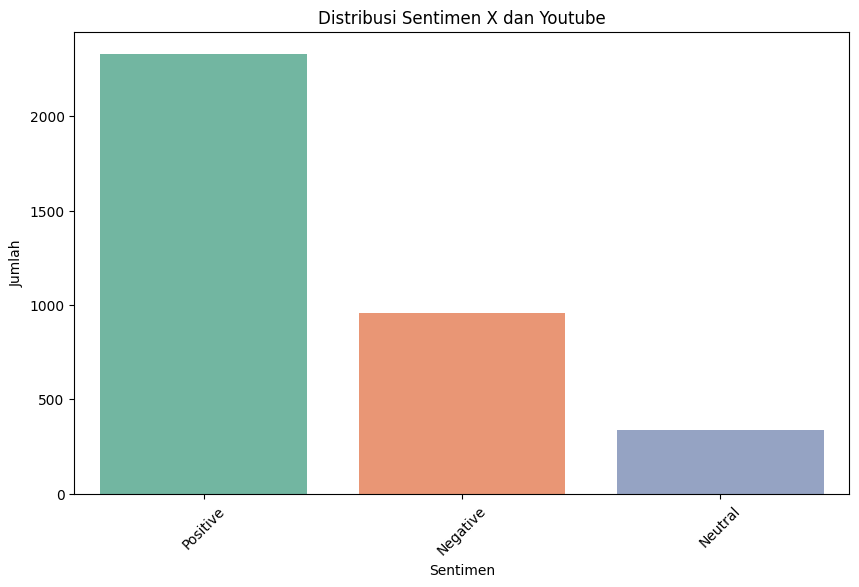

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the size of the plot
plt.figure(figsize=(10, 6))

# Create a count plot for the sentiment labels
sns.countplot(x='label', data=labeled_df, palette='Set2')

# Set plot title and labels
plt.title('Distribusi Sentimen X dan Youtube')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [ ]:
output_file = 'sentiment.csv'

# Save the DataFrame to a CSV file without the index column
df.to_csv(output_file, index=False)

# TF-IDF

In [ ]:
!pip install scikit-learn

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from tabulate import tabulate

# Membaca data CSV
data = pd.read_csv("sentiment.csv", usecols=["stemmed"])
data.columns = ["stemmed"]

# Menghapus baris yang mengandung nilai NaN pada kolom 'stemming_sentence'
data = data.dropna(subset=['stemmed'])

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the vectorizer on the cleaned data
tfidf_matrix = tfidf_vectorizer.fit_transform(data['stemmed'])

# Use built-in IDF from TfidfVectorizer
terms = tfidf_vectorizer.get_feature_names_out()
idf = tfidf_vectorizer.idf_

# SPLIT DATA

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Membaca data CSV
data = pd.read_csv("sentiment.csv")

# Menghapus data yang memiliki nilai NaN pada kolom 'stemming_sentence'
data = data.dropna(subset=['stemmed'])

# Membaca dataset lexicon
lexicon_path = 'lexicon_based_dataset.csv'
lexicon_df = pd.read_csv(lexicon_path)

# Mengonversi kata-kata dalam lexicon menjadi dictionary
lexicon_dict = dict(zip(lexicon_df['word'], lexicon_df['weight']))

# Fungsi untuk menganalisis sentimen berdasarkan weight dalam lexicon
def analyze_sentiment(text):
    words = text.split()
    total_score = sum(lexicon_dict.get(word, 0) for word in words)  # Lebih efisien dengan .get()

    # Menentukan sentimen berdasarkan total score
    if total_score > 0:
        return 'Positif'
    elif total_score < 0:
        return 'Negatif'
    else:
        return 'Netral'

# Menerapkan analisis sentimen pada kolom 'stemming_sentence'
data['label'] = data['stemmed'].apply(analyze_sentiment)

# Memisahkan fitur (X) dan label (y)
X = data['stemmed']  # Fitur teks
y = data['label']              # Label target

# Split data (70% train, 15% validation, 15% test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# TF-IDF vectorization dengan bigram dan max_features=5000
tfidf = TfidfVectorizer(ngram_range=(1, 2), max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)  # Fit dan transform pada data pelatihan
X_val_tfidf = tfidf.transform(X_val)          # Transform pada data validasi
X_test_tfidf = tfidf.transform(X_test)        # Transform pada data uji

# Menampilkan informasi jumlah data
print("="*40)
print("\U0001F4CA **Informasi Pembagian Data**")
print(f"Total data      : {len(data)}")
print(f"Data latih      : {len(y_train)} ({(len(y_train)/len(data))*100:.2f}%)")
print(f"Data validasi   : {len(y_val)} ({(len(y_val)/len(data))*100:.2f}%)")
print(f"Data uji        : {len(y_test)} ({(len(y_test)/len(data))*100:.2f}%)")
print("="*40)


📊 **Informasi Pembagian Data**
Total data      : 3606
Data latih      : 2524 (69.99%)
Data validasi   : 541 (15.00%)
Data uji        : 541 (15.00%)


# >> METODE DAN VISUALISASI HEATMAP

# SVM


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE # Import SMOTE

# Inisialisasi model
#svm_model = SVC(kernel='linear', class_weight='balanced', C=10)
#svm_model = SVC(kernel='poly', degree=3)
#svm_model = SVC(kernel='rbf',C=1000, gamma=0.05)
#svm_model.fit(X_train_tfidf, y_train)

#Mencari tuning parameter terbaik
param_grid = {
    'svm__kernel': ['linear', 'rbf', 'poly'],
    'svm__C': [10, 100],  # Bisa ditambah variasinya
    'svm__degree': [3]  # Degree hanya berlaku untuk kernel polynomial
}

# Definisi pipeline
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),  # SMOTE hanya untuk training dalam CV
    ('svm', SVC())
])

grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X_train_tfidf, y_train)

print(f'Best Parameter {grid_search.best_params_}')
print(f'Best Score {grid_search.best_score_}')
print("Test Set Accuracy:", grid_search.best_estimator_.score(X_test_tfidf, y_test))

Best Parameter {'svm__C': 10, 'svm__degree': 3, 'svm__kernel': 'rbf'}
Best Score 0.8518230394468018
Test Set Accuracy: 0.8687615526802218


📊 **Evaluasi Model SVM dengan GridSearch dan SMOTE**
Jumlah data setelah SMOTE: 6330 sampel
Distribusi label setelah SMOTE:
[2110 2110 2110]

Akurasi Model: 86.51%

Laporan Klasifikasi:
               precision    recall  f1-score   support

     Negatif       0.87      0.99      0.93       442
      Netral       0.78      0.38      0.51        55
     Positif       0.82      0.20      0.33        44

    accuracy                           0.87       541
   macro avg       0.82      0.53      0.59       541
weighted avg       0.86      0.87      0.84       541



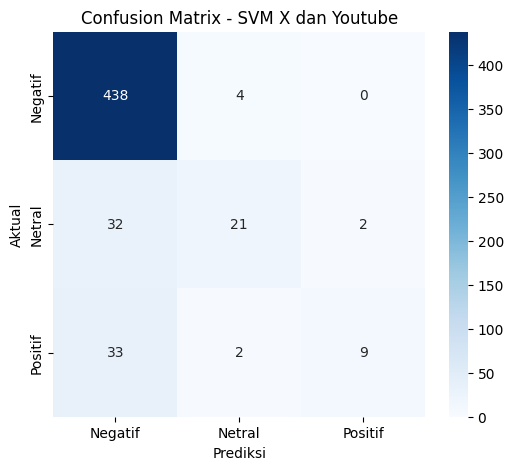

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Get the SMOTE-resampled data from the pipeline
X_resampled, y_resampled = grid_search.best_estimator_['smote'].fit_resample(X_train_tfidf, y_train)

# Convert y_resampled to numerical labels using LabelEncoder if it's not already numerical
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_resampled_encoded = le.fit_transform(y_resampled)

# Menampilkan jumlah dataset setelah SMOTE
print("="*40)
print("\U0001F4CA **Evaluasi Model SVM dengan GridSearch dan SMOTE**")
print(f"Jumlah data setelah SMOTE: {X_resampled.shape[0]} sampel")  # Pastikan X_resampled adalah hasil SMOTE
print(f"Distribusi label setelah SMOTE:\n{np.bincount(y_resampled_encoded)}\n") # Use the encoded labels here

# Melakukan prediksi pada data uji
y_pred = grid_search.best_estimator_.predict(X_test_tfidf)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Model: {accuracy * 100:.2f}%")
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))
print("="*40)

# Membuat confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
labels = ['Negatif', 'Netral', 'Positif']

# Visualisasi confusion matrix sebagai heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix - SVM X dan Youtube")
plt.show()

📊 **Evaluasi Model SVM dengan GridSearch dan SMOTE**
Akurasi Model: 86.51%

Laporan Klasifikasi:
               precision    recall  f1-score   support

     Negatif       0.87      0.99      0.93       442
      Netral       0.78      0.38      0.51        55
     Positif       0.82      0.20      0.33        44

    accuracy                           0.87       541
   macro avg       0.82      0.53      0.59       541
weighted avg       0.86      0.87      0.84       541



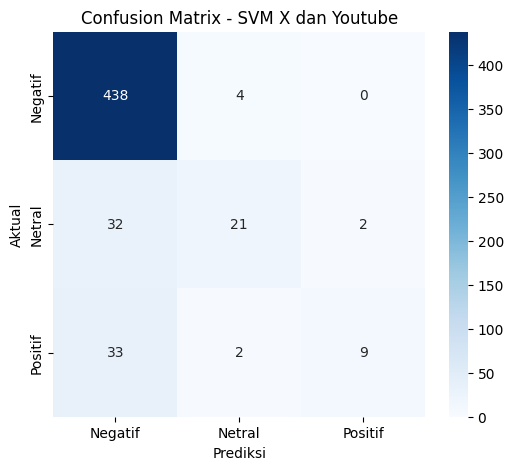

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Melakukan prediksi pada data uji
y_pred = grid_search.best_estimator_.predict(X_test_tfidf)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print("="*40)
print("\U0001F4CA **Evaluasi Model SVM dengan GridSearch dan SMOTE**")
print(f"Akurasi Model: {accuracy * 100:.2f}%")
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))
print("="*40)

# Membuat confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
labels = ['Negatif', 'Netral', 'Positif']

# Visualisasi confusion matrix sebagai heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix - SVM X dan Youtube")
plt.show()

Best Parameter: {'svm__C': 10, 'svm__degree': 3, 'svm__kernel': 'rbf'}
Best CV Score: 0.8637
📊 **Evaluasi Model SVM dengan GridSearch dan SMOTE**
Akurasi Model: 86.69%

Laporan Klasifikasi:
               precision    recall  f1-score   support

     Negatif       0.87      0.99      0.93       442
      Netral       0.81      0.38      0.52        55
     Positif       0.82      0.20      0.33        44

    accuracy                           0.87       541
   macro avg       0.83      0.53      0.59       541
weighted avg       0.86      0.87      0.84       541


==== Kernel: LINEAR ====
Akurasi: 83.55%

Laporan Klasifikasi:
              precision    recall  f1-score   support

     Negatif       0.87      0.12      0.21       442
      Netral       0.10      0.87      0.19        55
     Positif       0.69      0.25      0.37        44

    accuracy                           0.21       541
   macro avg       0.55      0.41      0.26       541
weighted avg       0.78      0.21     

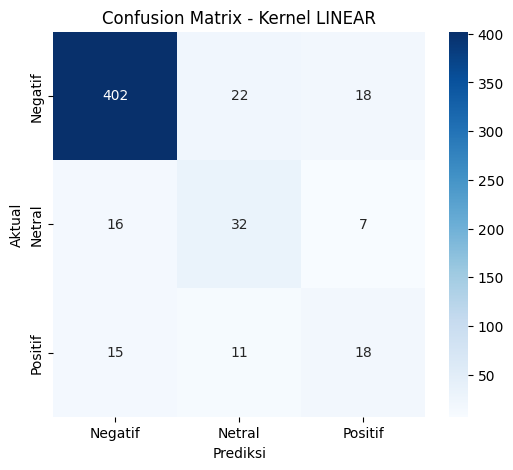


==== Kernel: RBF ====
Akurasi: 85.95%

Laporan Klasifikasi:
              precision    recall  f1-score   support

     Negatif       0.87      0.12      0.21       442
      Netral       0.10      0.87      0.19        55
     Positif       0.69      0.25      0.37        44

    accuracy                           0.21       541
   macro avg       0.55      0.41      0.26       541
weighted avg       0.78      0.21      0.22       541



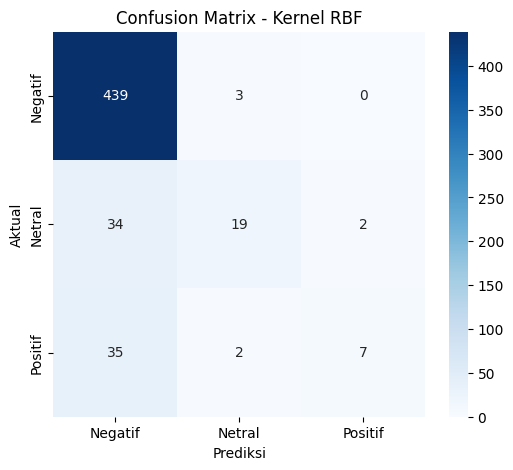


==== Kernel: POLY ====
Akurasi: 20.89%

Laporan Klasifikasi:
              precision    recall  f1-score   support

     Negatif       0.87      0.12      0.21       442
      Netral       0.10      0.87      0.19        55
     Positif       0.69      0.25      0.37        44

    accuracy                           0.21       541
   macro avg       0.55      0.41      0.26       541
weighted avg       0.78      0.21      0.22       541



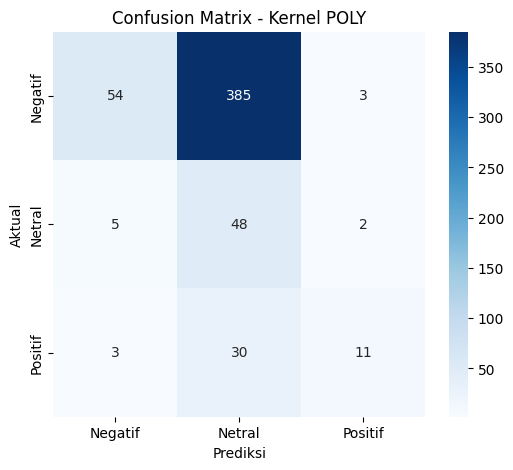

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Definisi hyperparameter untuk GridSearch
param_grid = {
    'svm__kernel': ['linear', 'rbf', 'poly'],
    'svm__C': [10, 100],
    'svm__degree': [3]  # Hanya berlaku untuk kernel polynomial
}

# Definisi pipeline
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('svm', SVC())
])

# GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_tfidf, y_train)

# Menampilkan hasil terbaik
print(f'Best Parameter: {grid_search.best_params_}')
print(f'Best CV Score: {grid_search.best_score_:.4f}')

# Prediksi pada data uji
y_pred = grid_search.best_estimator_.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print("="*40)
print("\U0001F4CA **Evaluasi Model SVM dengan GridSearch dan SMOTE**")
print(f"Akurasi Model: {accuracy * 100:.2f}%")
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))
print("="*40)

# Membandingkan performa dari tiap kernel
kernel_results = {}
for kernel in ['linear', 'rbf', 'poly']:
    pipeline.set_params(svm__kernel=kernel)
    pipeline.fit(X_train_tfidf, y_train)
    y_pred_kernel = pipeline.predict(X_test_tfidf)
    kernel_results[kernel] = {
        'accuracy': accuracy_score(y_test, y_pred_kernel),
        'report': classification_report(y_test, y_pred_kernel, output_dict=True),
        'conf_matrix': confusion_matrix(y_test, y_pred_kernel)
    }

# Menampilkan hasil per kernel
for kernel, result in kernel_results.items():
    print(f"\n==== Kernel: {kernel.upper()} ====")
    print(f"Akurasi: {result['accuracy'] * 100:.2f}%")
    print("\nLaporan Klasifikasi:")
    print(classification_report(y_test, pipeline.predict(X_test_tfidf)))

    # Visualisasi Confusion Matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(result['conf_matrix'], annot=True, fmt="d", cmap="Blues", xticklabels=['Negatif', 'Netral', 'Positif'], yticklabels=['Negatif', 'Netral', 'Positif'])
    plt.xlabel("Prediksi")
    plt.ylabel("Aktual")
    plt.title(f"Confusion Matrix - Kernel {kernel.upper()}")
    plt.show()


Fitting 5 folds for each of 6 candidates, totalling 30 fits
📊 **Evaluasi Model SVM dengan GridSearch dan SMOTE**
✅ Best Parameters: {'svm__C': 10, 'svm__degree': 3, 'svm__kernel': 'rbf'}
✅ Best Cross-Validation Score: 0.8637

🔹 **Akurasi Model**: 86.69%

📊 **Laporan Klasifikasi:**
               precision    recall  f1-score   support

     Negatif       0.87      0.99      0.93       442
      Netral       0.81      0.38      0.52        55
     Positif       0.82      0.20      0.33        44

    accuracy                           0.87       541
   macro avg       0.83      0.53      0.59       541
weighted avg       0.86      0.87      0.84       541


🔹 **Kernel: LINEAR**
   - Akurasi: 83.55%

📊 **Laporan Klasifikasi:**
              precision    recall  f1-score   support

     Negatif       0.87      0.12      0.21       442
      Netral       0.10      0.87      0.19        55
     Positif       0.69      0.25      0.37        44

    accuracy                           0.21    

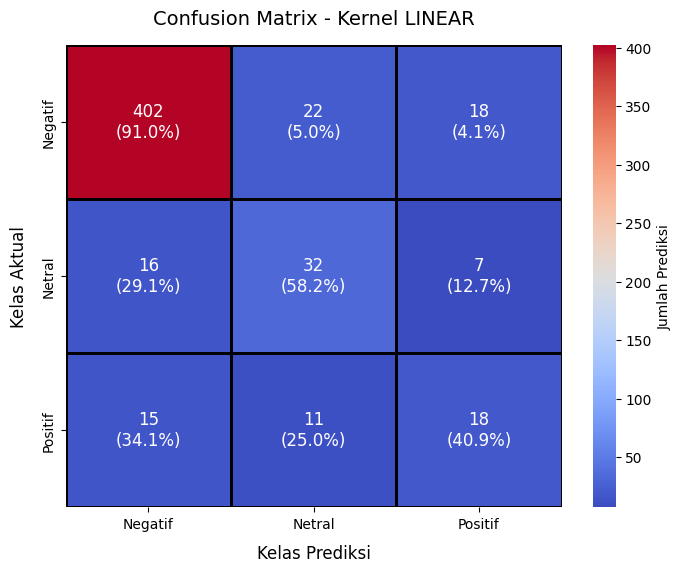


🔹 **Kernel: RBF**
   - Akurasi: 85.95%

📊 **Laporan Klasifikasi:**
              precision    recall  f1-score   support

     Negatif       0.87      0.12      0.21       442
      Netral       0.10      0.87      0.19        55
     Positif       0.69      0.25      0.37        44

    accuracy                           0.21       541
   macro avg       0.55      0.41      0.26       541
weighted avg       0.78      0.21      0.22       541



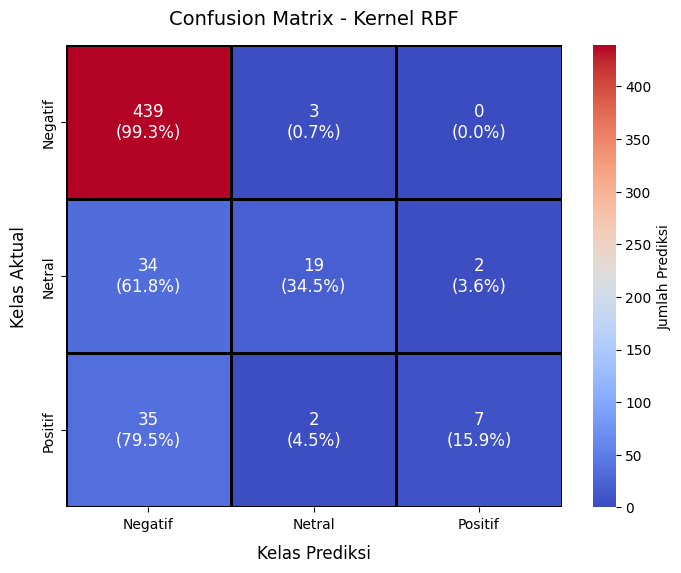


🔹 **Kernel: POLY**
   - Akurasi: 20.89%

📊 **Laporan Klasifikasi:**
              precision    recall  f1-score   support

     Negatif       0.87      0.12      0.21       442
      Netral       0.10      0.87      0.19        55
     Positif       0.69      0.25      0.37        44

    accuracy                           0.21       541
   macro avg       0.55      0.41      0.26       541
weighted avg       0.78      0.21      0.22       541



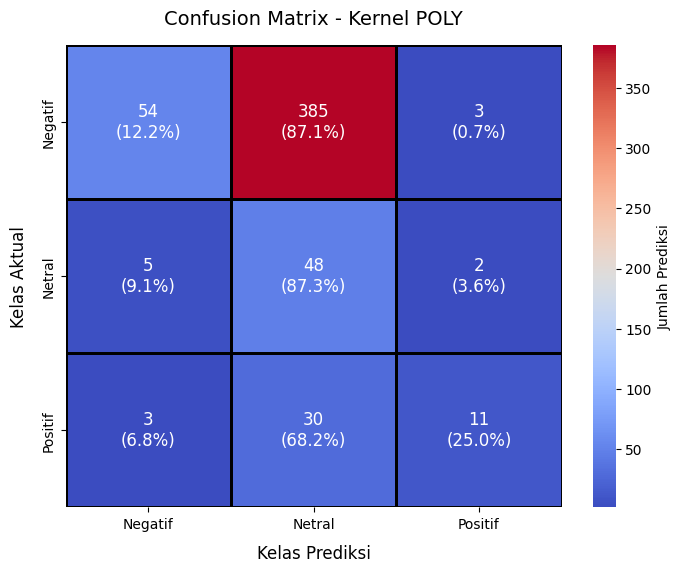

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Definisi hyperparameter untuk GridSearch
param_grid = {
    'svm__kernel': ['linear', 'rbf', 'poly'],
    'svm__C': [10, 100],
    'svm__degree': [3]  # Hanya berlaku untuk kernel polynomial
}

# Definisi pipeline
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('svm', SVC())
])

# GridSearchCV dengan verbose untuk melihat progres
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train_tfidf, y_train)

# Menampilkan hasil terbaik
print("="*50)
print("\U0001F4CA **Evaluasi Model SVM dengan GridSearch dan SMOTE**")
print(f"✅ Best Parameters: {grid_search.best_params_}")
print(f"✅ Best Cross-Validation Score: {grid_search.best_score_:.4f}")
print("="*50)

# Prediksi pada data uji
y_pred = grid_search.best_estimator_.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)

# Menampilkan hasil evaluasi
print(f"\n🔹 **Akurasi Model**: {accuracy * 100:.2f}%")
print("\n📊 **Laporan Klasifikasi:**\n", classification_report(y_test, y_pred))
print("="*50)

# Fungsi untuk menampilkan heatmap confusion matrix dengan legenda warna
def plot_confusion_matrix(conf_matrix, kernel_name, class_labels):
    plt.figure(figsize=(8, 6))

    # Menghitung persentase dari total masing-masing kelas aktual
    conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100

    # Format angka agar menampilkan jumlah absolut + persentase
    labels = np.array([
        [f"{val}\n({pct:.1f}%)" for val, pct in zip(row, pct_row)]
        for row, pct_row in zip(conf_matrix, conf_matrix_percent)
    ])

    # Membuat heatmap dengan colormap yang lebih intuitif
    ax = sns.heatmap(
        conf_matrix,
        annot=labels,
        fmt='',
        cmap='coolwarm',  # Warna yang lebih mudah dipahami
        xticklabels=class_labels,
        yticklabels=class_labels,
        linewidths=1,
        linecolor='black',
        cbar_kws={'label': 'Jumlah Prediksi'}  # Menambahkan legenda warna
    )

    # Menambahkan label yang lebih jelas
    ax.set_xlabel("Kelas Prediksi", fontsize=12, labelpad=10)
    ax.set_ylabel("Kelas Aktual", fontsize=12, labelpad=10)
    ax.set_title(f"Confusion Matrix - Kernel {kernel_name.upper()}", fontsize=14, pad=15)

    # Menyesuaikan ukuran anotasi agar lebih terbaca
    for text in ax.texts:
        text.set_size(12)

    plt.show()

# Membandingkan performa dari tiap kernel
kernel_results = {}
class_labels = ['Negatif', 'Netral', 'Positif']

for kernel in ['linear', 'rbf', 'poly']:
    pipeline.set_params(svm__kernel=kernel)
    pipeline.fit(X_train_tfidf, y_train)
    y_pred_kernel = pipeline.predict(X_test_tfidf)

    kernel_results[kernel] = {
        'accuracy': accuracy_score(y_test, y_pred_kernel),
        'report': classification_report(y_test, y_pred_kernel, output_dict=True),
        'conf_matrix': confusion_matrix(y_test, y_pred_kernel)
    }

# Menampilkan hasil per kernel dengan heatmap yang lebih mudah dipahami
for kernel, result in kernel_results.items():
    print(f"\n🔹 **Kernel: {kernel.upper()}**")
    print(f"   - Akurasi: {result['accuracy'] * 100:.2f}%")
    print("\n📊 **Laporan Klasifikasi:**")
    print(classification_report(y_test, pipeline.predict(X_test_tfidf)))

    # Plot confusion matrix dengan format yang lebih informatif
    plot_confusion_matrix(result['conf_matrix'], kernel, class_labels)


Fitting 5 folds for each of 6 candidates, totalling 30 fits
📊 **Evaluasi Model SVM dengan GridSearch dan SMOTE**
✅ Best Parameters: {'svm__C': 10, 'svm__degree': 3, 'svm__kernel': 'rbf'}
✅ Best Cross-Validation Score: 0.8637

🔹 **Akurasi Model**: 86.51%

📊 **Laporan Klasifikasi:**
               precision    recall  f1-score   support

     Negatif       0.87      0.99      0.93       442
      Netral       0.78      0.38      0.51        55
     Positif       0.82      0.20      0.33        44

    accuracy                           0.87       541
   macro avg       0.82      0.53      0.59       541
weighted avg       0.86      0.87      0.84       541


🔹 **Kernel: LINEAR**
   - Akurasi: 84.29%

📊 **Laporan Klasifikasi:**
              precision    recall  f1-score   support

     Negatif       0.88      0.12      0.21       442
      Netral       0.10      0.89      0.19        55
     Positif       0.79      0.25      0.38        44

    accuracy                           0.21    

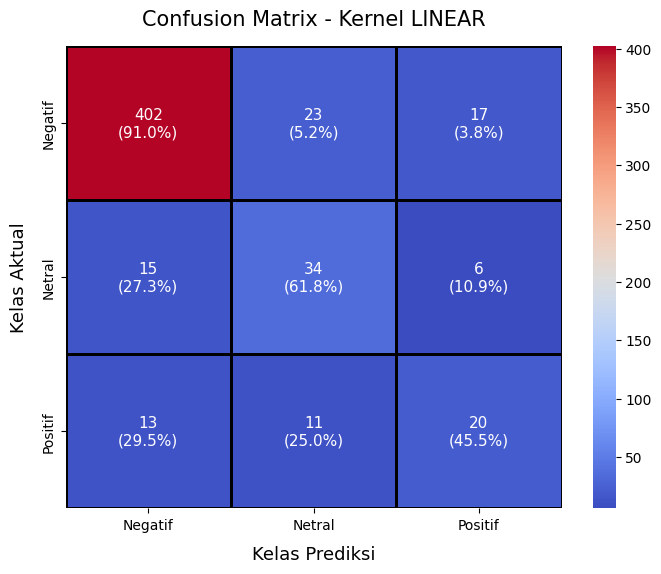


🔹 **Kernel: RBF**
   - Akurasi: 86.51%

📊 **Laporan Klasifikasi:**
              precision    recall  f1-score   support

     Negatif       0.88      0.12      0.21       442
      Netral       0.10      0.89      0.19        55
     Positif       0.79      0.25      0.38        44

    accuracy                           0.21       541
   macro avg       0.59      0.42      0.26       541
weighted avg       0.79      0.21      0.22       541



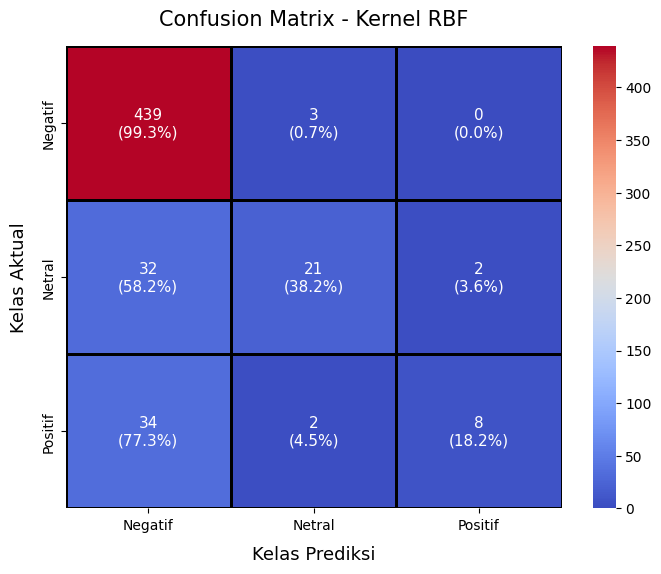


🔹 **Kernel: POLY**
   - Akurasi: 20.70%

📊 **Laporan Klasifikasi:**
              precision    recall  f1-score   support

     Negatif       0.88      0.12      0.21       442
      Netral       0.10      0.89      0.19        55
     Positif       0.79      0.25      0.38        44

    accuracy                           0.21       541
   macro avg       0.59      0.42      0.26       541
weighted avg       0.79      0.21      0.22       541



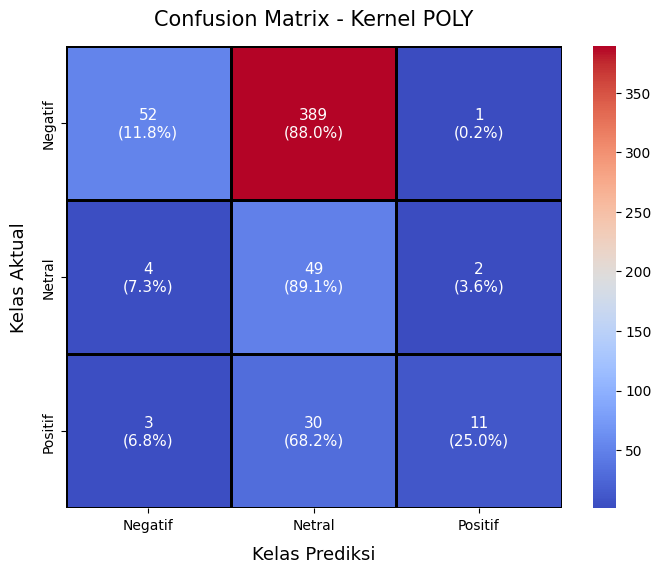

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Definisi hyperparameter untuk GridSearch
param_grid = {
    'svm__kernel': ['linear', 'rbf', 'poly'],
    'svm__C': [10, 100],
    'svm__degree': [3]  # Hanya berlaku untuk kernel polynomial
}

# Definisi pipeline
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('svm', SVC())
])

# GridSearchCV dengan verbose untuk melihat progres
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train_tfidf, y_train)

# Menampilkan hasil terbaik
print("="*50)
print("\U0001F4CA **Evaluasi Model SVM dengan GridSearch dan SMOTE**")
print(f"✅ Best Parameters: {grid_search.best_params_}")
print(f"✅ Best Cross-Validation Score: {grid_search.best_score_:.4f}")
print("="*50)

# Prediksi pada data uji
y_pred = grid_search.best_estimator_.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)

# Menampilkan hasil evaluasi
print(f"\n🔹 **Akurasi Model**: {accuracy * 100:.2f}%")
print("\n📊 **Laporan Klasifikasi:**\n", classification_report(y_test, y_pred))
print("="*50)

# Fungsi untuk menampilkan heatmap confusion matrix dengan format lebih profesional
def plot_confusion_matrix(conf_matrix, kernel_name, class_labels):
    plt.figure(figsize=(8, 6))

    # Menghitung persentase dari total masing-masing kelas aktual
    conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100

    # Format angka agar menampilkan jumlah absolut + persentase
    labels = np.array([
        [f"{val}\n({pct:.1f}%)" for val, pct in zip(row, pct_row)]
        for row, pct_row in zip(conf_matrix, conf_matrix_percent)
    ])

    # Membuat heatmap dengan tambahan warna lebih kontras dan legend
    ax = sns.heatmap(
        conf_matrix,
        annot=labels,
        fmt='',
        cmap='coolwarm',
        xticklabels=class_labels,
        yticklabels=class_labels,
        linewidths=1,
        linecolor='black',
        cbar=True
    )

    # Menambahkan label lebih jelas
    ax.set_xlabel("Kelas Prediksi", fontsize=13, labelpad=10)
    ax.set_ylabel("Kelas Aktual", fontsize=13, labelpad=10)
    ax.set_title(f"Confusion Matrix - Kernel {kernel_name.upper()}", fontsize=15, pad=15)

    # Menyesuaikan ukuran anotasi agar lebih terbaca
    for text in ax.texts:
        text.set_size(11)

    plt.show()

# Membandingkan performa dari tiap kernel
kernel_results = {}
class_labels = ['Negatif', 'Netral', 'Positif']

for kernel in ['linear', 'rbf', 'poly']:
    pipeline.set_params(svm__kernel=kernel)
    pipeline.fit(X_train_tfidf, y_train)
    y_pred_kernel = pipeline.predict(X_test_tfidf)

    kernel_results[kernel] = {
        'accuracy': accuracy_score(y_test, y_pred_kernel),
        'report': classification_report(y_test, y_pred_kernel, output_dict=True),
        'conf_matrix': confusion_matrix(y_test, y_pred_kernel)
    }

# Menampilkan hasil per kernel dengan heatmap yang lebih mudah dibaca
for kernel, result in kernel_results.items():
    print(f"\n🔹 **Kernel: {kernel.upper()}**")
    print(f"   - Akurasi: {result['accuracy'] * 100:.2f}%")
    print("\n📊 **Laporan Klasifikasi:**")
    print(classification_report(y_test, pipeline.predict(X_test_tfidf)))

    # Plot confusion matrix dengan format yang lebih informatif
    plot_confusion_matrix(result['conf_matrix'], kernel, class_labels)


# KNN


Distribusi awal sebelum SMOTE: Counter({np.int64(0): 2110, np.int64(2): 236, np.int64(1): 178})
Distribusi setelah SMOTE: Counter({np.int64(0): 2110, np.int64(2): 283, np.int64(1): 250})


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 4 is smaller than n_iter=5. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Nilai K terbaik: 5
Parameter terbaik: {'knn__n_neighbors': 5, 'knn__metric': 'euclidean', 'knn__leaf_size': 30, 'knn__algorithm': 'auto'}
📊 **Evaluasi Model KNN dengan GridSearch dan SMOTE**
Akurasi Model: 76.71%

Laporan Klasifikasi:
               precision    recall  f1-score   support

     Negatif       0.90      0.84      0.87       442
      Netral       0.35      0.53      0.42        55
     Positif       0.31      0.30      0.30        44

    accuracy                           0.77       541
   macro avg       0.52      0.56      0.53       541
weighted avg       0.79      0.77      0.78       541



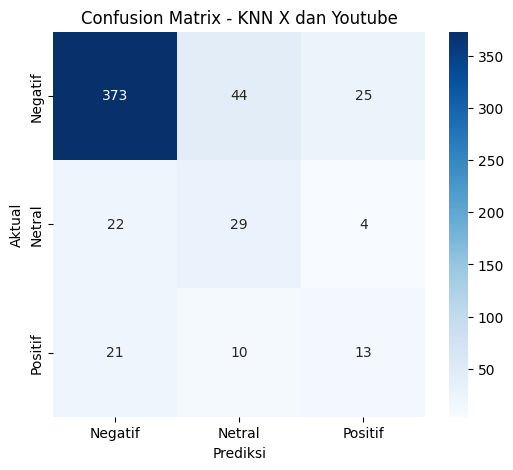

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MaxAbsScaler, LabelEncoder
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter

# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Reduksi dimensi dengan TruncatedSVD
svd = TruncatedSVD(n_components=50, random_state=42)
X_train_svd = svd.fit_transform(X_train_tfidf)
X_test_svd = svd.transform(X_test_tfidf)

# Encode labels jika masih dalam bentuk string
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)

# Cek distribusi awal data sebelum SMOTE
class_counts = Counter(y_train_encoded)
print("Distribusi awal sebelum SMOTE:", class_counts)

# Pastikan nilai sampling lebih besar dari jumlah asli setiap kelas minoritas
netral_label = le.transform(['Netral'])[0] if 'Netral' in le.classes_ else None
positif_label = le.transform(['Positif'])[0] if 'Positif' in le.classes_ else None

sampling_strategy = {}
if netral_label is not None:
    sampling_strategy[netral_label] = int(max(1.2 * class_counts.get(netral_label, 0), 250))
if positif_label is not None:
    sampling_strategy[positif_label] = int(max(1.2 * class_counts.get(positif_label, 0), 200))

smote = SMOTE(sampling_strategy=sampling_strategy, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_svd, y_train_encoded)

# Cek distribusi setelah SMOTE
print("Distribusi setelah SMOTE:", Counter(y_resampled))

# Definisi pipeline untuk KNN dengan MaxAbsScaler
pipeline = Pipeline([
    ('scaler', MaxAbsScaler()),
    ('knn', KNeighborsClassifier(weights='distance'))
])

# Parameter grid untuk GridSearchCV
param_grid = {
    'knn__n_neighbors': [3, 5],
    'knn__metric': ['euclidean', 'manhattan'],
    'knn__algorithm': ['auto'],
    'knn__leaf_size': [30]
}

# Grid search dengan RandomizedSearchCV
grid_search = RandomizedSearchCV(
    pipeline, param_grid, n_iter=5, cv=3, scoring='accuracy', n_jobs=-1, random_state=42
)

# Fit model
grid_search.fit(X_resampled, y_resampled)

# Menampilkan parameter terbaik
best_params = grid_search.best_params_
best_k = best_params['knn__n_neighbors']
print(f"Nilai K terbaik: {best_k}")
print(f"Parameter terbaik: {best_params}")

# Evaluasi model dengan parameter terbaik
y_pred_knn = grid_search.best_estimator_.predict(X_test_svd)

# Convert y_pred_knn back to original labels using inverse_transform
y_pred_knn_original = le.inverse_transform(y_pred_knn)

accuracy_knn = accuracy_score(y_test, y_pred_knn_original)
print("="*40)
print("\U0001F4CA **Evaluasi Model KNN dengan GridSearch dan SMOTE**")
print(f"Akurasi Model: {accuracy_knn * 100:.2f}%")
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred_knn_original))  # Use original labels
print("="*40)

# Membuat confusion matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn_original)  # Use y_pred_knn_original here
labels = ['Negatif', 'Netral', 'Positif']

# Visualisasi confusion matrix sebagai heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix - KNN X dan Youtube")
plt.show()

Distribusi awal sebelum SMOTE: Counter({np.int64(0): 2110, np.int64(2): 236, np.int64(1): 178})
Distribusi setelah SMOTE: Counter({np.int64(0): 2110, np.int64(2): 283, np.int64(1): 250})


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 4 is smaller than n_iter=5. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Nilai K terbaik: 5
Parameter terbaik: {'knn__n_neighbors': 5, 'knn__metric': 'euclidean', 'knn__leaf_size': 30, 'knn__algorithm': 'auto'}
📊 **Evaluasi Model KNN dengan GridSearch dan SMOTE**
Akurasi Model: 76.71%

📊 **Laporan Klasifikasi:**
               precision    recall  f1-score   support

     Negatif       0.90      0.84      0.87       442
      Netral       0.35      0.53      0.42        55
     Positif       0.31      0.30      0.30        44

    accuracy                           0.77       541
   macro avg       0.52      0.56      0.53       541
weighted avg       0.79      0.77      0.78       541



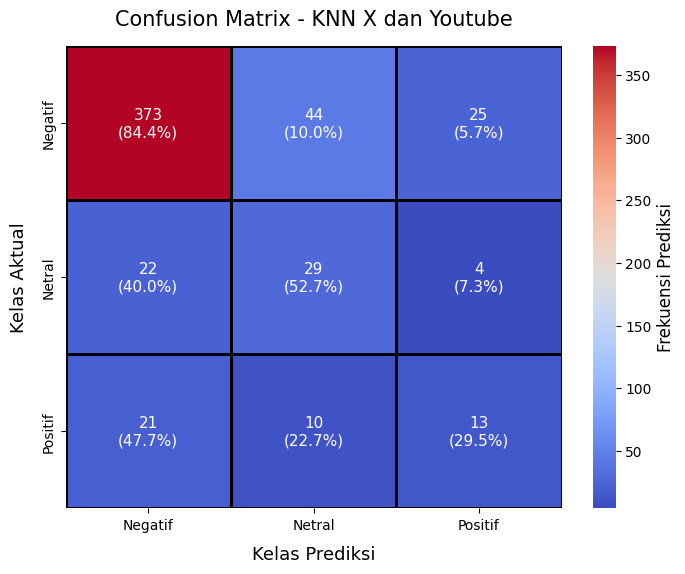

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MaxAbsScaler, LabelEncoder
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter

# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)  # Transform saja, jangan fit ulang!

# Reduksi dimensi dengan TruncatedSVD
svd = TruncatedSVD(n_components=50, random_state=42)
X_train_svd = svd.fit_transform(X_train_tfidf)
X_test_svd = svd.transform(X_test_tfidf)

# Encode labels jika masih dalam bentuk string
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)

# Cek distribusi awal sebelum SMOTE
print("Distribusi awal sebelum SMOTE:", Counter(y_train_encoded))

# Pastikan nilai sampling lebih besar dari jumlah asli setiap kelas minoritas
netral_label = le.transform(['Netral'])[0] if 'Netral' in le.classes_ else None
positif_label = le.transform(['Positif'])[0] if 'Positif' in le.classes_ else None

sampling_strategy = {}
if netral_label is not None:
    sampling_strategy[netral_label] = int(max(1.2 * Counter(y_train_encoded).get(netral_label, 0), 250))
if positif_label is not None:
    sampling_strategy[positif_label] = int(max(1.2 * Counter(y_train_encoded).get(positif_label, 0), 200))

smote = SMOTE(sampling_strategy=sampling_strategy, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_svd, y_train_encoded)

# Cek distribusi setelah SMOTE
print("Distribusi setelah SMOTE:", Counter(y_resampled))

# Definisi pipeline untuk KNN dengan MaxAbsScaler
pipeline = Pipeline([
    ('scaler', MaxAbsScaler()),
    ('knn', KNeighborsClassifier(weights='distance'))
])

# Parameter grid untuk GridSearchCV
param_grid = {
    'knn__n_neighbors': [3, 5],
    'knn__metric': ['euclidean', 'manhattan'],
    'knn__algorithm': ['auto'],
    'knn__leaf_size': [30]
}

# Grid search dengan RandomizedSearchCV
grid_search = RandomizedSearchCV(
    pipeline, param_grid, n_iter=5, cv=3, scoring='accuracy', n_jobs=-1, random_state=42
)

# Fit model
grid_search.fit(X_resampled, y_resampled)

# Menampilkan parameter terbaik
best_params = grid_search.best_params_
best_k = best_params['knn__n_neighbors']
print(f"Nilai K terbaik: {best_k}")
print(f"Parameter terbaik: {best_params}")

# Evaluasi model dengan parameter terbaik
y_pred_knn = grid_search.best_estimator_.predict(X_test_svd)

# Convert y_pred_knn back to original labels using inverse_transform
y_pred_knn_original = le.inverse_transform(y_pred_knn)

accuracy_knn = accuracy_score(y_test, y_pred_knn_original)  # Use original labels for accuracy

print("="*50)
print("\U0001F4CA **Evaluasi Model KNN dengan GridSearch dan SMOTE**")
print(f"Akurasi Model: {accuracy_knn * 100:.2f}%")
print("\n📊 **Laporan Klasifikasi:**\n", classification_report(y_test, y_pred_knn_original))  # Use original labels
print("="*50)

# Membuat confusion matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn_original)  # Use y_pred_knn_original here
labels = ['Negatif', 'Netral', 'Positif']

# Fungsi untuk menampilkan confusion matrix dengan format yang lebih profesional
def plot_confusion_matrix(conf_matrix, title):
    plt.figure(figsize=(8, 6))

    # Menghitung persentase dari total masing-masing kelas aktual
    conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100

    # Format angka agar menampilkan jumlah absolut + persentase
    labels_text = np.array([
        [f"{val}\n({pct:.1f}%)" for val, pct in zip(row, pct_row)]
        for row, pct_row in zip(conf_matrix, conf_matrix_percent)
    ])

    # Membuat heatmap dengan tambahan warna lebih kontras dan legenda warna
    ax = sns.heatmap(
        conf_matrix,
        annot=labels_text,
        fmt='',
        cmap='coolwarm',
        xticklabels=labels,
        yticklabels=labels,
        linewidths=1,
        linecolor='black',
        cbar=True  # Menampilkan color bar agar lebih intuitif
    )

    # Menambahkan label lebih jelas
    ax.set_xlabel("Kelas Prediksi", fontsize=13, labelpad=10)
    ax.set_ylabel("Kelas Aktual", fontsize=13, labelpad=10)
    ax.set_title(title, fontsize=15, pad=15)

    # Menyesuaikan ukuran anotasi agar lebih terbaca
    for text in ax.texts:
        text.set_size(11)

    # Menambahkan legenda warna agar lebih jelas
    cbar = ax.collections[0].colorbar
    cbar.set_label('Frekuensi Prediksi', fontsize=12)

    plt.show()

# Plot confusion matrix dengan format yang lebih informatif
plot_confusion_matrix(conf_matrix_knn, "Confusion Matrix - KNN X dan Youtube")
